### MiniProyecto6
##### Andrei Portales 19
##### Hugo Román 19199


In [151]:
import random
import matplotlib.pyplot as plt

### Ejercicio 1

1. Cree un programa en su lenguaje de programación favorito que use el método de Monte Carlo para
determinar la probabilidad de cara o escudo en una moneda justa

In [152]:
def lanzamiento():
    # Generar un numero entre 0 y 1
    x = random.uniform(0, 1)
    if x > 0.5:
        # caras = true
        return True
    else:
        # escudos = false
        return False

probabilidad = []
 
#simulando 1000 experimentos
for i in range(1000):
     
    # cada experimento tiene 10 lanzamientos de monedas
    N = 10
    resultados = [] #guardar los resultados en un array
    for i in range(N):
        result = lanzamiento()
        resultados.append(result)
 
    n_caras = sum(resultados)
    p_caras = n_caras/N
    probabilidad.append(p_caras)
 
p_carasM = sum(probabilidad)/1000
 
print("Probability is {:.3f}".format(p_carasM))

Probability is 0.501


2. Grafique usando una gráfica de línea las iteraciones (eje x) y la probabilidad de de las mismas (eje y).


### Ejercicio 2

Consideren un juego imaginario en el que el jugador tiene que escoger una token numerado de 1 a 100 de una caja.

Las reglas son las siguientes:
1. Los tokens están numerados de 1 a 100 en la caja
2. Los jugadores pueden apostar por un número par o impar que saldrá al tomar el token de la caja
3. En este juego, 10 y 11 son números especiales. Si se apuesta por un número par, entonces 10 será considerado un número impar; si se apuesta por un número impar, entonces 11 será considerado como un número par.
4. Si se apuesta por un número par y se obtiene 10 entonces se pierde.
5. Si se apuesta por un número impar y se obtiene 11 entonces se pierde

In [156]:
def simulate_game(dinero_total, dinero_apuesta, juegos_totales):
    money = dinero_total
    apuestas = 0

    for game in range(juegos_totales):
        apuesta = random.randint(0, 1)
        apuestas += 1
        token = random.randint(1, 100)

        ispar = token % 2 == 0

        if apuesta == 0 and ispar:
            if token == 10:
                break
            money += dinero_apuesta
        else:
            money -= dinero_apuesta

        if apuesta == 1 and not ispar:
            if token == 11:
                break
            money += dinero_apuesta
        else:
            money -= dinero_apuesta

        if money <= 0:
            break
    return money, apuestas

In [157]:
a = [simulate_game(100, 1, 50) for i in range(10)]
b = [simulate_game(100, 1, 50) for i in range(1000)]
c = [simulate_game(100, 1, 10000) for i in range(10)]

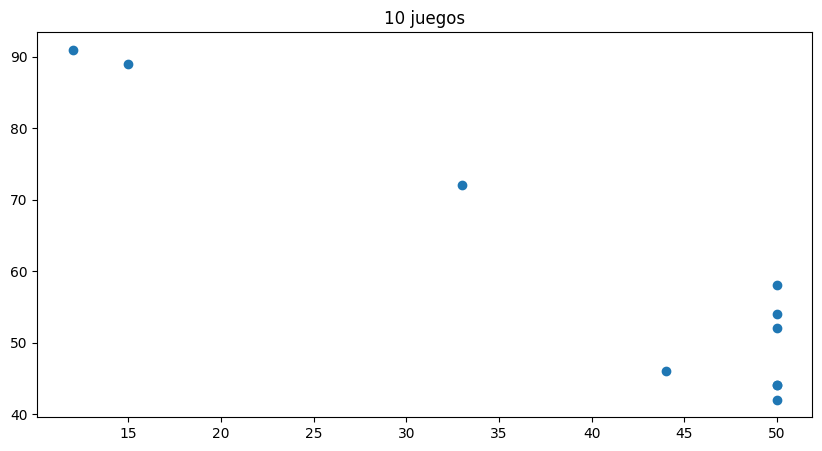

In [164]:
plt.figure(figsize=(10, 5))
plt.title("10 juegos")
ejex = [i[1] for i in a]
ejey = [i[0] for i in a]
plt.scatter(ejex, ejey)